<a href="https://colab.research.google.com/github/DiegoMBrito/Sprint_2/blob/main/Machine_Learning/jupiter_notebook/MVP_Sprint2_ML_Diego_Brito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do projeto de Machine Learning

Os terremotos são um dos desastres naturais mais destrutivos e imprevisíveis do mundo, causando danos significativos de várias formas à vida humana. Embora os cientistas tenham feito progressos significativos na previsão de terremotos, ainda não é possível saber com antecedência onde ocorrerá um terromoto.

As ondas sísmicas emitidas pelos terremotos podem ser detectadas, registradas e analisadas através de aparelhos chamados sismógrafos. Desta análise pode-se obter informações sobre a localização precisa do terremoto (epicentro), sua profundidade, energia liberada, o mecanismo gerador do abalo, e o meio que as ondas percorreram para chegar ao local onde foram geradas até o sensor que as detectou.

Os dados desse projeto foram extraídas do site Kaggle, fonte: https://www.kaggle.com/datasets/varunsaikanuri/earthquakes-from-1900-2013

Este projeto foca em um problema de Regressão, onde o objetivo é predizer a magnitude de um terremoto em um dado local, atráves do treinamento de um modelo de machine learning, tendo como base o dataset com informações de terremotos que ocorretram no planeta desde o ano de 1900 até 2014.

## 1. Importando e instalando algumas bibliotecas necessárias para executação deste notebook.

In [50]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## 2. Baixando e tratando os dados que serão usados como entrada para o modelo de Machine Learning.

In [51]:
# Importa dados de um arquivo .csv do repositório github
# Dataset de registros de ocorrência de terremotos entre 05/01/1900 até 17/04/2014, fonte: https://www.kaggle.com/datasets/varunsaikanuri/earthquakes-from-1900-2013

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/DiegoMBrito/Sprint_2/main/Machine_Learning/data/Earthquakes.csv"

# Lê o arquivo .csv
earth = pd.read_csv(url, sep=',')

# Verifica o tipo de earth
print(type(earth))

<class 'pandas.core.frame.DataFrame'>


### Descrição dos atributos que serão usados do dataset:

- Mag - Magnitude (medido na escala Richter) do terremoto;
- Date - Dia do evento;
- Time - Hora do evento;
- Latitude/Longitude - Coordedanadas geográficas do local do terremoto;
- DEPTH - A profundidade onde o terremoto começa a se formar (Epicentro);
- magType - Unidade de medida do abalo sísmico;
- type - Evento gerador da ocorrência do abalo sísmico;
- Place - Cidade de ocorrência (proximidade) do evento.

In [52]:
# Exibe as 5 primiras e 5 últimas linhas do dataset
earth

,Unnamed: 0,Date,Time,latitude,longitude,depth,mag,magType,nst,net,id,updated,place,type
0,0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,NaN,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake
1,1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,NaN,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake
2,2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,NaN,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake
3,3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,NaN,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake
4,4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,NaN,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,8308,1900-01-31,19:22:00,48.0000,146.0000,450.0,7.5,mj,0.0,centennial,centennial19000131192200,2013-07-09T19:07:15.000Z,northwest of the Kuril Islands,earthquake
8309,8309,1900-01-20,06:33:00,20.0000,-105.0000,0.0,7.3,mw,0.0,centennial,centennial19000120063300,2013-07-09T19:07:15.000Z,"Jalisco, Mexico",earthquake
8310,8310,1900-01-18,07:46:00,44.5000,148.5000,35.0,6.7,mj,0.0,centennial,centennial19000118074600,2013-07-09T19:07:15.000Z,Kuril Islands,earthquake
8311,8311,1900-01-11,09:07:00,-5.0000,148.0000,0.0,7.0,ms,0.0,centennial,centennial19000111090700,2013-07-09T19:07:15.000Z,Bismarck Sea,earthquake


In [53]:
# Mostra as dimensões do dataset earthquake (instâncias e atributos)
earth.shape

(8313, 14)

In [54]:
# Mostra as informações do dataset (informações sobre o tipo de dados dos atributos)
earth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8313 non-null   int64  
 1   Date        8313 non-null   object 
 2   Time        8313 non-null   object 
 3   latitude    8313 non-null   float64
 4   longitude   8313 non-null   float64
 5   depth       8313 non-null   float64
 6   mag         8312 non-null   float64
 7   magType     8298 non-null   object 
 8   nst         8111 non-null   float64
 9   net         8313 non-null   object 
 10  id          8313 non-null   object 
 11  updated     8313 non-null   object 
 12  place       8304 non-null   object 
 13  type        8313 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 909.4+ KB


In [55]:
# Exibe os nomes das colunas
earth.columns

Index(['Unnamed: 0', 'Date', 'Time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'net', 'id', 'updated', 'place', 'type'],
      dtype='object')

### Pré-Pocessamento do dataset

#### Tratamento de valores missings

<Axes: >

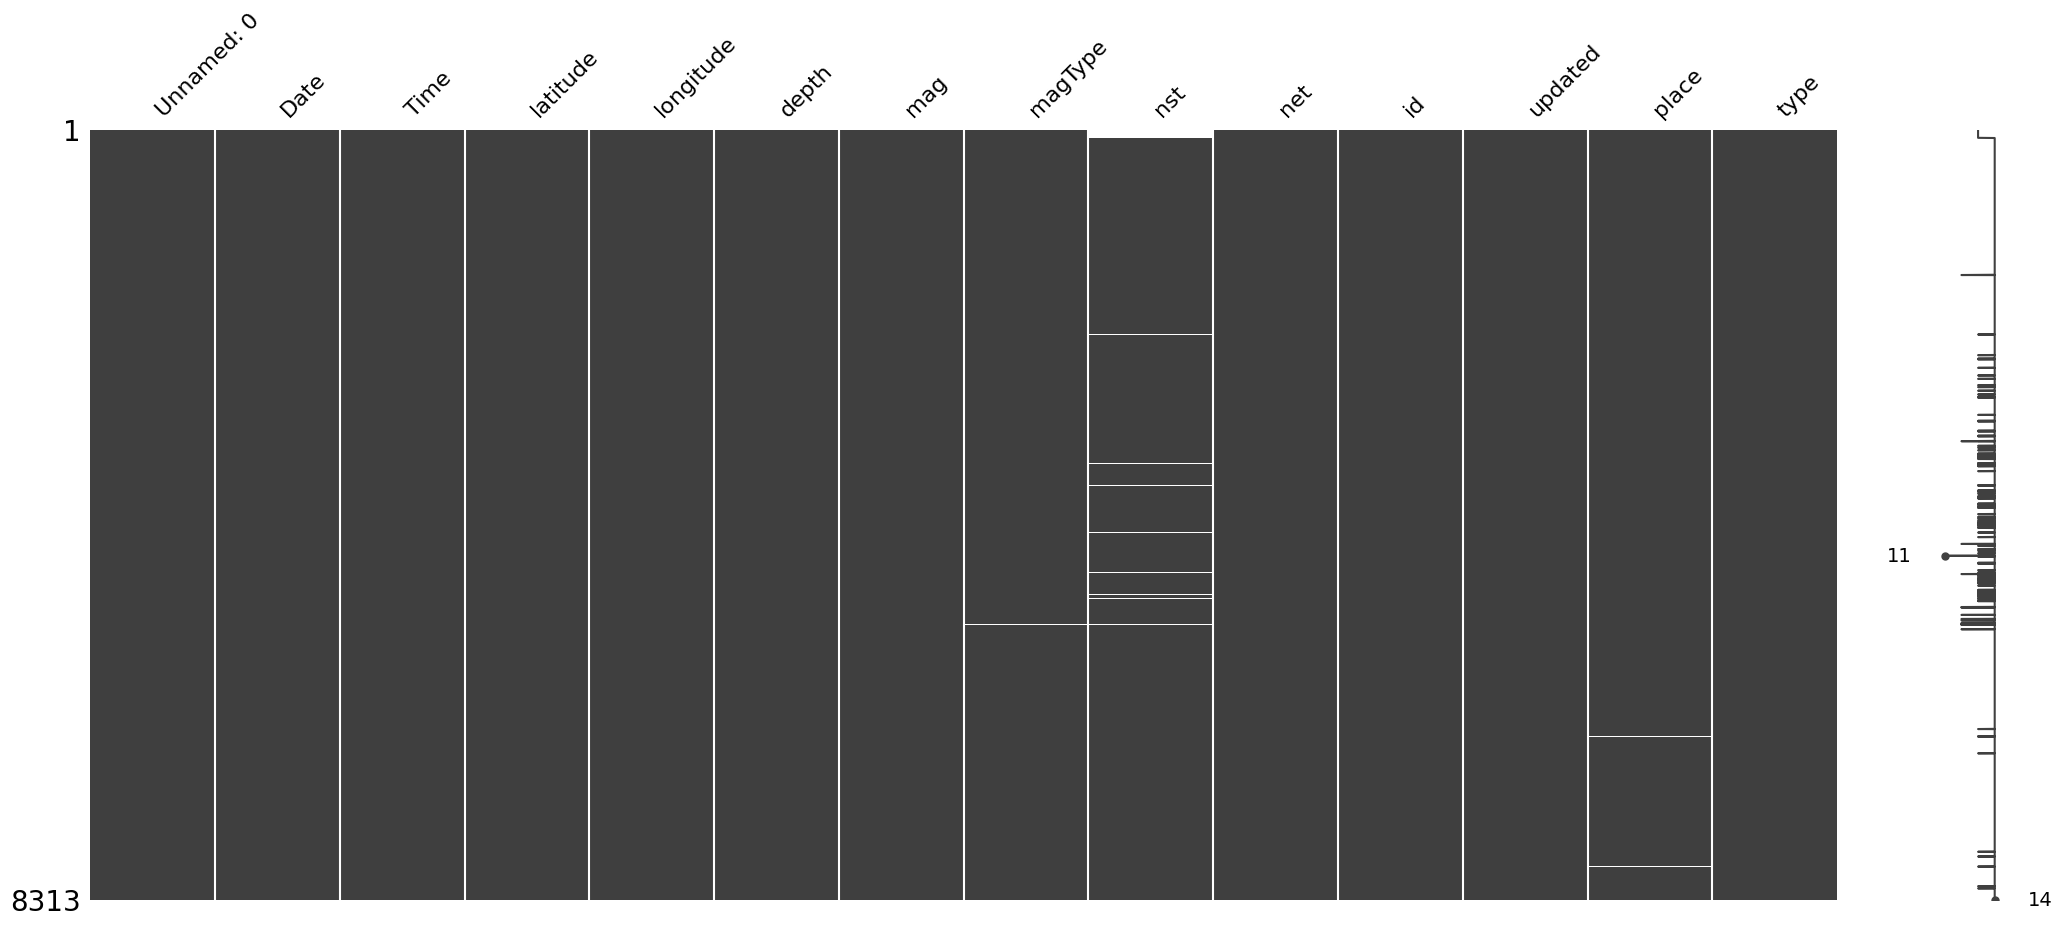

In [56]:
# Exibe a visualização matricial da nulidade do dataframe
ms.matrix(earth)

Substituindo valores missings por outros valores.

In [57]:
earth["place"].fillna("None", inplace= True)

In [58]:
earth["nst"].fillna("0.0", inplace= True)

In [59]:
earth["magType"].fillna("mww", inplace= True)

In [60]:
earth["mag"].fillna("7.2", inplace= True)

<Axes: >

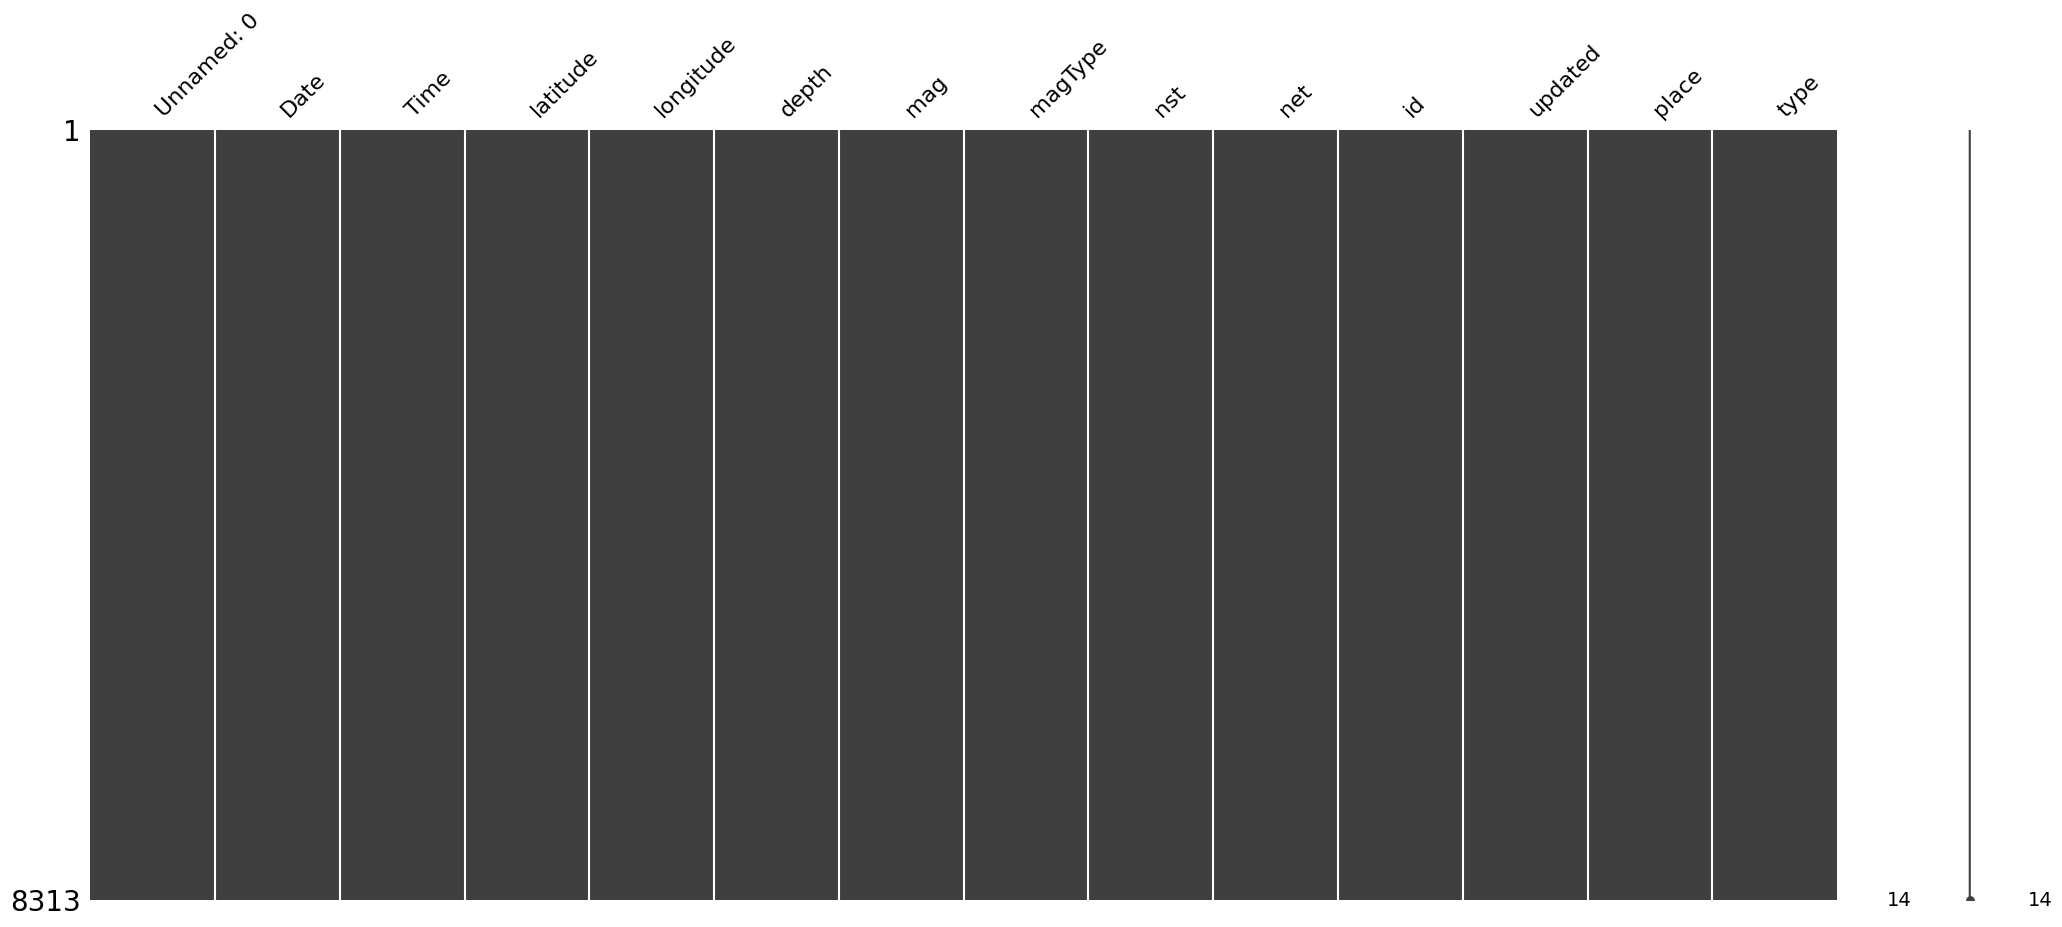

In [61]:
# Exibe a visualização matricial da nulidade do dataframe
ms.matrix(earth)

In [62]:
# Verifica se ainda há valores nulls no dataset
earth.isna().sum()

Unnamed: 0    0
Date          0
Time          0
latitude      0
longitude     0
depth         0
mag           0
magType       0
nst           0
net           0
id            0
updated       0
place         0
type          0
dtype: int64

Vou fazer um tratamento na classe 'place' para remover tudo o que houver antes da ','. Quero deixar somente o país da ocorrência.

In [63]:
# Extrair apenas o nome do país da coluna "place"
earth['country'] = earth['place'].apply(lambda x: x.split(",")[-1].strip())

Vou fazer um tratamento nas classes 'date' e 'time' para que sejam mostradas em horas, desde o primeiro evento do dataset.

In [64]:
# Converter a coluna de data para o tipo datetime
earth['Date'] = pd.to_datetime(earth['Date'])

# Calcular a diferença em horas entre a data inicial (05/01/1900) e cada valor da coluna de data
earth['hours_since_1900'] = (earth['Date'] - pd.Timestamp('1900-01-05')).dt.total_seconds() / 3600

# Calcular a soma total das horas
total_hours = earth['hours_since_1900'].sum()

print("Total de horas desde 05/01/1900:", total_hours)

Total de horas desde 05/01/1900: 5508732816.0


In [65]:
# Use o método astype() para converter a coluna de 'object' para 'float64'
earth['mag'] = earth['mag'].astype('float64')

In [66]:
# exibi o dataset após o pré-processamento
earth

,Unnamed: 0,Date,Time,latitude,longitude,depth,mag,magType,nst,net,id,updated,place,type,country,hours_since_1900
0,0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,0.0,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake,Chile,1001016.0
1,1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,0.0,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake,Chile,1000992.0
2,2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,0.0,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake,Peru,1000968.0
3,3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,0.0,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake,Peru,1000968.0
4,4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,0.0,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake,Japan,1000920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,8308,1900-01-31,19:22:00,48.0000,146.0000,450.0,7.5,mj,0.0,centennial,centennial19000131192200,2013-07-09T19:07:15.000Z,northwest of the Kuril Islands,earthquake,northwest of the Kuril Islands,624.0
8309,8309,1900-01-20,06:33:00,20.0000,-105.0000,0.0,7.3,mw,0.0,centennial,centennial19000120063300,2013-07-09T19:07:15.000Z,"Jalisco, Mexico",earthquake,Mexico,360.0
8310,8310,1900-01-18,07:46:00,44.5000,148.5000,35.0,6.7,mj,0.0,centennial,centennial19000118074600,2013-07-09T19:07:15.000Z,Kuril Islands,earthquake,Kuril Islands,312.0
8311,8311,1900-01-11,09:07:00,-5.0000,148.0000,0.0,7.0,ms,0.0,centennial,centennial19000111090700,2013-07-09T19:07:15.000Z,Bismarck Sea,earthquake,Bismarck Sea,144.0


Mostra uma figura iterativa ilustrando o local da ocorrência de cada evento e sua magnitude.

In [67]:
map_fig = px.scatter_geo(earth,
                        lon='longitude',lat='latitude',
                        projection='orthographic',
                        opacity=.8,
                        color='mag',
                        size='depth',
                        hover_data=['mag','depth'],
                        height=800,
                        width=800
)
map_fig.show()

## 2. Modelagem e treinamento do modelo de Machine Learning.

Criação de um novo dataset cotendo somente as classes que serão usadas para o treinamento do modelo de Machine Learning.

In [68]:
# Seleciona as features relevantes (exceto a classe target)
selected_features = ['latitude', 'longitude', 'depth', 'magType', 'country', 'type', 'hours_since_1900']
X = earth[selected_features]

In [69]:
# Exibe o dataset criado para treinamento do modelo de Machine Learning
X

,latitude,longitude,depth,magType,country,type,hours_since_1900
0,-20.0030,-70.8741,17.0,mww,Chile,earthquake,1001016.0
1,-19.9246,-70.6278,20.0,mww,Chile,earthquake,1000992.0
2,-5.5660,-80.8790,9.8,mwp,Peru,earthquake,1000968.0
3,-14.0935,-76.2968,20.0,mww,Peru,earthquake,1000968.0
4,33.6793,131.8197,79.0,mwb,Japan,earthquake,1000920.0
...,...,...,...,...,...,...,...
8308,48.0000,146.0000,450.0,mj,northwest of the Kuril Islands,earthquake,624.0
8309,20.0000,-105.0000,0.0,mw,Mexico,earthquake,360.0
8310,44.5000,148.5000,35.0,mj,Kuril Islands,earthquake,312.0
8311,-5.0000,148.0000,0.0,ms,Bismarck Sea,earthquake,144.0


Separando as classes categóricas das numéricas para fazer o tratamento com o OneHotEncoder (OHE).

In [70]:
# Cria lista das classes categóricas para usar o OHE
categorical_columns = [col for col in X.columns if X.dtypes[col] == 'object']

# Cria lista das classes numéricas
# creating list of numerical columns to standardized data
numerical_columns = [col for col in X.columns if ((X.dtypes[col] != 'object') & (col != 'Status'))]

print('Features categóricas: ',categorical_columns)
print('Features numéricas: ',numerical_columns)

Features categóricas:  ['magType', 'country', 'type']
Features numéricas:  ['latitude', 'longitude', 'depth', 'hours_since_1900']


In [71]:
# Aplica o OneHotEncoder nas classes categóricas
categorical_columns = ['magType', 'country', 'type']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = onehot_encoder.fit_transform(X[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Agrupando as features numéricas e categóricas processadas para o treinamento do modelo.

In [72]:
# Concatena as features numéricas com as categóricas codificadas pelo OneHotEncoder
X_encoded = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns), index=X.index)
X_encoded = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)

In [73]:
# Exibe o dataset para treinamento e teste do modelo de Machine Learning.
X_encoded

,latitude,longitude,depth,hours_since_1900,magType_Mw,magType_Mwb,magType_Mwc,magType_Mwp,magType_Mww,magType_mb,...,country_western Afghanistan,country_western Indian-Antarctic Ridge,country_western Iran,country_western Kazakhstan,country_western Mongolia,country_western Montana,country_western Turkey,country_western Uzbekistan,country_western Xizang,country_western Xizang-India border region
0,-20.0030,-70.8741,17.0,1001016.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-19.9246,-70.6278,20.0,1000992.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5.5660,-80.8790,9.8,1000968.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-14.0935,-76.2968,20.0,1000968.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.6793,131.8197,79.0,1000920.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,48.0000,146.0000,450.0,624.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8309,20.0000,-105.0000,0.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8310,44.5000,148.5000,35.0,312.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8311,-5.0000,148.0000,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# Definir a classe target
y = earth['mag']

Separando o dataset em amostras de treino e teste. Será destinado um total de 20% das amostras para teste do modelo.

In [75]:
# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [76]:
# Normalizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Usando o SelectKbest para melhorar a eficácia e o tempo de processamento no treino do modelo, pois vou reduzir as classes de 387 para 20.

In [77]:
# Usar o SelectKBest para selecionar as features mais importantes

k_best = SelectKBest(score_func=f_regression, k=20) # número de features que serão selecionadas
X_train_kbest = k_best.fit_transform(X_train_scaled, y_train)
X_test_kbest = k_best.transform(X_test_scaled)

# Obter os índices das colunas selecionadas pelo SelectKBest
selected_feature_indices = k_best.get_support(indices=True)

# Obter os nomes das colunas selecionadas
selected_feature_names = X_encoded.columns[selected_feature_indices]

# Visualizar as features selecionadas pelo SelectKBest
print("Features selecionadas pelo SelectKBest:")
print(selected_feature_names)

Features selecionadas pelo SelectKBest:
Index(['latitude', 'depth', 'hours_since_1900', 'magType_mb', 'magType_mj',
       'magType_ms', 'magType_mw', 'magType_mwb', 'magType_mwc', 'magType_mww',
       'country_Chile', 'country_Mexico', 'country_Mid-Indian Ridge',
       'country_Pacific-Antarctic Ridge', 'country_Tonga',
       'country_central East Pacific Rise', 'country_eastern Kazakhstan',
       'country_south of Panama', 'country_southern East Pacific Rise',
       'country_west of Macquarie Island'],
      dtype='object')


Inciando o treinamento do modelo com os modelos de Regressão Linear, Ridge, Lasso, Árvore de Decisão, KNN, SVM e Randon Forest.

In [78]:
# Criar uma lista contendo os modelos que você deseja avaliar
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    RandomForestRegressor(random_state=42)
]

# Lista para armazenar os resultados dos modelos
model_results = []


Definindo alguns parâmetros para o tuning de hiperparâmetro dos modelos que serão treinados.
OBS: Tentei aumentar o número de variáveis dos hiperparâmetros, porém o custo de processamento se mostrou inviável.

In [79]:
# Parâmetros para tuning de hiperparâmetros
param_grid_general = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
    'DecisionTreeRegressor': {'max_depth': [None, 10, 20]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

Aplicando a validação cruzada  com GridSearchCV e guardando o resultado das métricas utilizadas no treino. O modelo que obtiver o melhor resultado de RMSE será usado para fazer a predição do conjunto de teste.

In [ ]:
# Iterar sobre os modelos e calcular as métricas de desempenho usando validação cruzada
for model in models:
    model_name = model.__class__.__name__
    print("Treinando e avaliando o modelo:", model_name)

    param_grid = param_grid_general.get(model_name, {})
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=10)

    # Realizar validação cruzada com GridSearchCV e calcular métricas de desempenho
    grid_search.fit(X_train_kbest, y_train)
    best_model = grid_search.best_estimator_
    cv_scores_rmse = np.sqrt(-grid_search.cv_results_['mean_test_score'])

    # Armazenar as métricas e o modelo no resultado
    model_results.append({
        'model': best_model,
        'name': model_name,
        'MAE': None,
        'MAE_std': None,
        'MSE': None,
        'MSE_std': None,
        'RMSE': cv_scores_rmse.mean(),
        'RMSE_std': cv_scores_rmse.std()
    })


Treinando e avaliando o modelo: LinearRegression
Treinando e avaliando o modelo: Ridge
Treinando e avaliando o modelo: Lasso
Treinando e avaliando o modelo: KNeighborsRegressor
Treinando e avaliando o modelo: DecisionTreeRegressor
Treinando e avaliando o modelo: SVR
Treinando e avaliando o modelo: RandomForestRegressor


In [ ]:
# Imprimir os resultados
for model_result in model_results:
    print("Modelo:", model_result['name'])
    print("Média do RMSE na validação cruzada:", model_result['RMSE'])
    print("Desvio padrão do RMSE na validação cruzada:", model_result['RMSE_std'])
    print("="*30)

In [ ]:
# Selecionar o modelo com o melhor resultado de RMSE na validação cruzada
best_model_result = min(model_results, key=lambda x: x['RMSE'])
best_model_name = best_model_result['name']
best_model = best_model_result['model']

print("Modelo selecionado com o melhor RMSE:", best_model_name)

Melhorando os hiperparâmetros do modelo RandomForestRegressor, que obtve o melhor resultado.

In [ ]:
# Fazer o tuning de hiperparâmetros apenas para o modelo selecionado (RandomForestRegressor)
if best_model_name == 'RandomForestRegressor':
    print("Tuning de hiperparâmetros para o modelo selecionado...")
    best_model.fit(X_train_kbest, y_train)
    print("Parâmetros otimizados:", best_model.get_params())

Executando o treino do modelo RandomForestRegressor no conjunto de teste.

In [ ]:
# Treinar o modelo escolhido com todas as amostras de treinamento
best_model.fit(X_train_kbest, y_train)

Fazendo a predição no conjunto de teste com o modelo RandomForestRegressor.

In [ ]:
# Fazer a predição no conjunto de teste com o modelo selecionado
y_pred = best_model.predict(X_test_kbest)

In [ ]:
# Avaliar o desempenho do modelo escolhido no conjunto de teste
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE) no conjunto de teste:", mae)
print("Mean Squared Error (MSE) no conjunto de teste:", mse)
print("Root Mean Squared Error (RMSE) no conjunto de teste:", rmse)

In [ ]:
# Análise de Resíduos
residuals = y_test - y_pred

In [ ]:
# Plotar gráfico de dispersão dos resíduos versus valores previstos
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")
plt.show()

Este gráfico mostra se os resíduos estão distribuídos aleatoriamente em torno de zero. Se os pontos estiverem aleatoriamente espalhados em torno da linha vermelha horizontal em zero, isso indica que os resíduos estão bem distribuídos.

In [ ]:
# Plotar gráfico de distribuição dos resíduos
sns.histplot(residuals, kde=True)
plt.xlabel("Resíduos")
plt.title("Distribuição dos Resíduos")
plt.show()

Este gráfico mostra a distribuição dos resíduos. Idealmente, eles devem seguir uma distribuição normal com média zero. Desvios significativos da normalidade podem indicar que o modelo não capturou todas as informações importantes nos dados.